# ヘミシンクゲートウェイシリーズ使用時の脳波を計測してみる

ゲートウェイを含めたヘミシンクシリーズは、バイノーラルビートをベースとした脳波のダビング技術によって特殊な精神状態や体験を誘導するものである。

* [The US Army Funded Astral Projection and Hypnosis Research in the 80s](https://motherboard.vice.com/en_us/article/pad4a9/the-us-army-funded-astral-projection-and-hypnosis-research-in-the-80s)

記事の筆者キャロライン・ハスキンズ（アメリカの科学技術ジャーナリスト）によると、米軍は1970年代後半から80年代にかけて超心理学に興味を示し、  
「プロジェクト・センターレーン 」と呼ばれた計画の元、1983年6月、米陸軍マクネドネル中佐に「モンロー研究所」が提供する「ヘミシンク」というサービスの評価を命じた。  

マクドネル中佐はこの命により、バージニア州にあるモンロー研究所で、7日間のプログラムを体験した。  

中佐はこのプログラムで得た経験を陸軍フォーマットで29ページの報告書（以下「マクドネル・リポート」と呼ぶ）にまとめている。  

* [CIAマクドネル中佐の報告書](https://www.bttp.info/app/download/11049747794/CIA-McDonnell-report.pdf)

## 使用したセンサーとアプリケーション

* [Muse2](https://choosemuse.com/muse-2/)
* [Mind Monitor](https://mind-monitor.com/)

![](img/sensor.png)

## フーリエ変換

脳波を分解して可視化するためにフーリエ変換を行います

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wavio
import librosa
import librosa.display
# 脳波データをフーリエ変換する
ylim = 35

def _plot_spec(df_eeg):
    y = df_eeg.mean(axis=1).values
    D = librosa.stft(y, n_fft=512, hop_length=150)  # STFT
    S, phase = librosa.magphase(D)  # 複素数を強度と位相へ変換
    DB = librosa.amplitude_to_db(S) # 強度をdb単位へ変換

    plt.figure(figsize=(16, 6))
    librosa.display.specshow(DB, sr=150, hop_length=150, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.ylim(0, ylim)
    plt.yticks(np.arange(0, ylim+1, 5))
    plt.show()
    plt.clf()
    plt.close()
    del D, DB, S, phase
    
def plot_spec_eeg(file_name):
    header = ["ts", "tp9", "af7", "af8", "tp10", "fpz", "hsi"]
    df_eeg = pd.read_csv(file_name, names=header)
    df_eeg = df_eeg.set_index("ts")
    try:
        df_eeg = df_eeg.fillna(0)
        df_eeg = df_eeg[df_eeg["hsi"] <= 4]
        df_eeg.pop("hsi")
    except:
        pass
    df_eeg.pop("fpz")
    df_len = len(df_eeg)
    # エクササイズ後半部分の誘導音声が対象のフォーカスとなっているのでそこだけ切り出す
    split_size = int(df_len/6)
    df_eeg = df_eeg.tail(split_size*3).head(split_size*2)
    print("(tp9 tp10 af7 af8)の平均値")
    _plot_spec(df_eeg)

## 古典的な脳波の分類

* δ波（デルタ波）：0.4-4Hz
* θ波（シータ波）：4-7Hz
* α波（アルファ波）：7-12Hz
* β波（ベータ波）：12-30Hz
* γ波（ガンマ波）：30-70Hz

## 通常状態の脳波

(tp9 tp10 af7 af8)の平均値


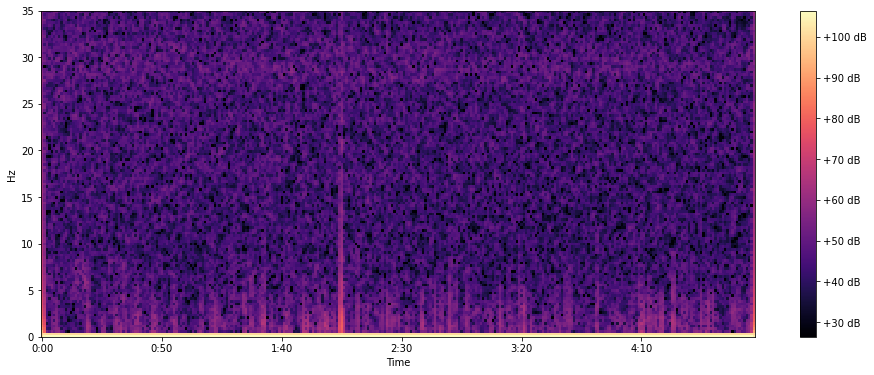

In [9]:
file_name="/logs/wakeup/eeg.csv"
plot_spec_eeg(file_name)

## 寝ている状態の脳波

(tp9 tp10 af7 af8)の平均値


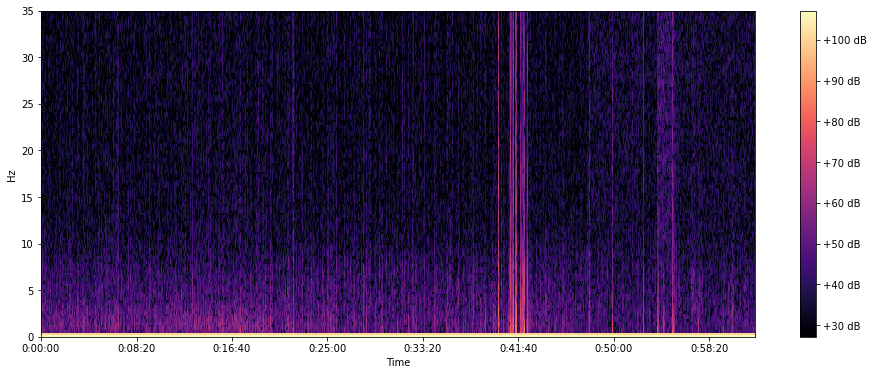

In [10]:
file_name="/logs/sleep-2022-05-09/eeg.csv"
plot_spec_eeg(file_name)

## フォーカス12状態の脳波

意識の拡大した状態・肉体的睡眠は深まりますが､肉体からの覚信号  
によって普段は抑えられていたやり方これは、人間の意識がは知覚し始めます。  
肉体へ完全に依存した状態から解放され､意識の自由を初めて認識する状態です。

(tp9 tp10 af7 af8)の平均値


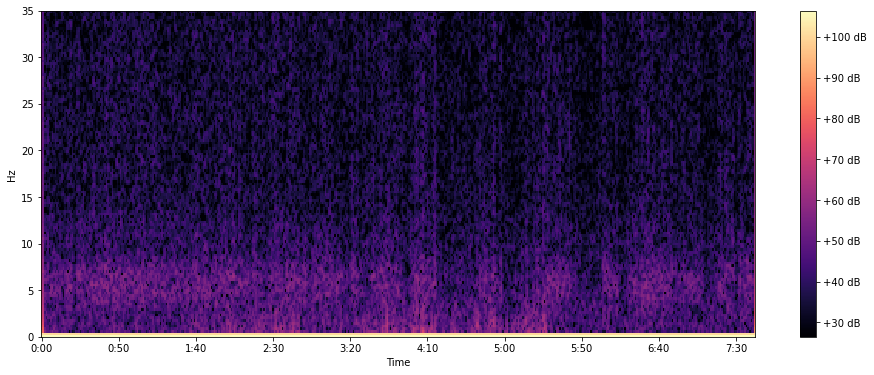

In [15]:
file_name="/logs/IntroF12-2022-04-30/eeg.csv"
plot_spec_eeg(file_name)

### 結果
フォーカス12はシータ波とアルファ波が大きく出ていることがわかる  
音源のピーク差分(誘導脳波)は(1Hz, 4Hz, 4Hz, 4Hz, 10Hz, 10Hz, 10Hz)なので  
概ね同じ周波数が出ている

## フォーカス15状態の脳波

時間のない状態･フォーカス15では、意識が肉体の知覚から段階的に解放され、  
時間のない状態を経験し始めます。 フォーカス15は、心が目覚めた状態のまま  
であることを除くと、深い睡眠状態に似ています

(tp9 tp10 af7 af8)の平均値


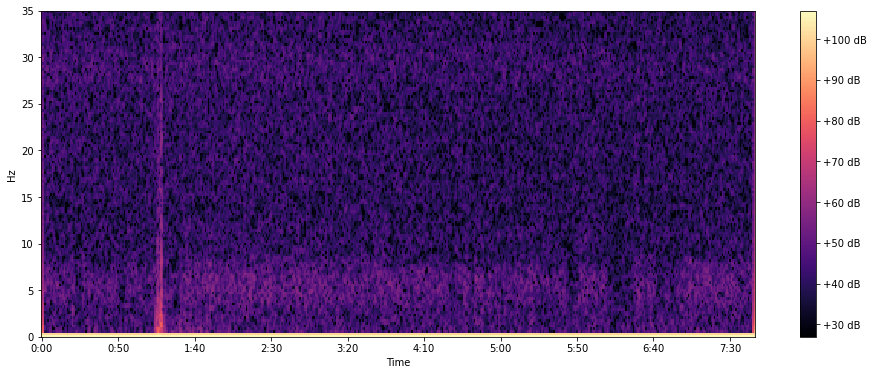

In [16]:
file_name="/logs/IntroF15-2022-04-28/eeg.csv"
plot_spec_eeg(file_name)

### 結果
フォーカス15はシータ波、アルファ波とガンマ波(30Hz帯)が強く出ている

音源のピーク差分(誘導脳波)は(1Hz, 4Hz, 4Hz, 8Hz, 7Hz, 8Hz)であるが、デルタ波ではなくガンマ波が出てしまっている。

## フォーカス27状態の脳波

現在組織化されつつある人間思考能力の先端、 「公園」のある場所、肉  
体の死によるトラウマから回復し、休息するための中継点。

(tp9 tp10 af7 af8)の平均値


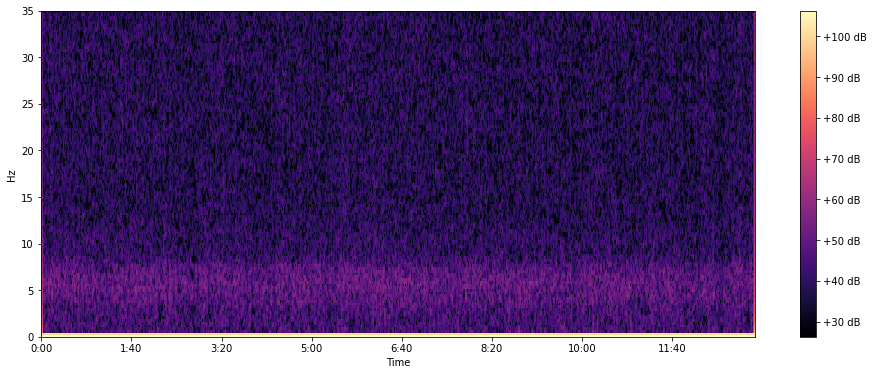

In [17]:
file_name="/logs/IntroF27-2022-05-03/eeg.csv"
plot_spec_eeg(file_name)

### 結果
フォーカス27はフォーカス12よりも更に強いシータ波とアルファ波が出ている。 

音源のピーク差分(誘導脳波)が(4Hz, 4Hz, 4Hz, 4Hz, 4Hz)であるからなのか7Hzよりも上の周波数が出ていないことがわかる。

## まとめ

各フォーカスを体験してみて、特に超心理学みたいな体験は得られなかった(鍛錬が足りないのかもしれない)    
無くしたと思っていた物の場所や、忘れてしまっていた子供の頃のトラウマ等がよみがえるといった、  
潜在意識へのアクセス？は何度か体験することができました。  

いわゆる誘導瞑想+アファメーションと呼ばれる暗示からくる自己催眠のような効果が期待できるのかと思いました。